# Heart Failure Machine Learning Models for the Prediction of Survival after going through Heart Failure

The dataset has observations of 13 variables for 299 patients

Variables in this dataset
1. Age: Age of the patient in years
2. Anaemia: Decrease of red blood cells or hemoglobin (0:Reduced or 1:Normal)
3. creatinine_phosphokinase: Level of the CPK enzyme in the blood (mcg/L)
4. Diabetes: If the patient has diabetes (0:No or 1:Yes)
5. ejection_fraction: Percentage of blood leaving the heart at each contraction (percentage)
6. high_blood_pressure: If the patient has hypertension (0:No or 1:Yes)
7. platelets: Platelets in the blood (kiloplatelets/mL)
8. serum_creatinine: Level of serum creatinine in the blood (mg/dL)
9. serum_sodium: Level of serum sodium in the blood (mEq/L)
10. sex: Biological sex of the patient (0:Female or 1:Male)
11. smoking: If the patient is a smoker (0:No or 1: Yes)
12. time: Follow-up period in days
13. death_event: If the patient survived till the end of follow-up period (0:No or 1:Yes )

## Importing all the Libraries

In [133]:
# importing pandas to work on the stroke dataset
import pandas as pd

# importing linear algebra
import numpy as np

#importing visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

# displaying plots
%matplotlib inline
# To increase the font size of the plots for readibility
#sns.set(font_scale=1.5)

# importing two different libraries for feature scaling
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

# for splitting of data
from sklearn.model_selection import train_test_split

# importing SMOTE package for unbalanced dataset
from imblearn.over_sampling import SMOTE

# importing logistic regression classifier
from sklearn.linear_model import LogisticRegression

# importing k-nearest neighbours classifier
from sklearn.neighbors import KNeighborsClassifier

# importing ML models performance parameters
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn import metrics
# Avoid Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing dataset into pandas dataframe
heart = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [4]:
heart.head() #print the first five rows of the dataset

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
# print the brief information aboiuyt the dataset such as number of rows and columns,
#memory used and the datatype.
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


## Exploratory Data Analysis

### Missing Data

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


Text(0.5, 1.0, 'Visualizing Missing Values')

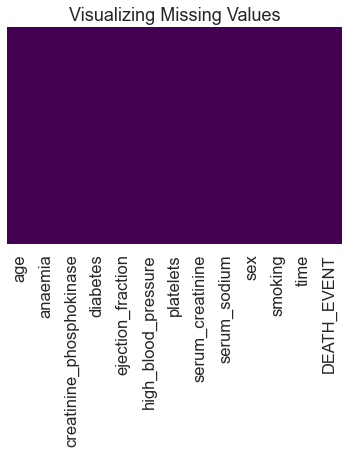

In [21]:
# print any missing values throughout the dataset
print(heart.isnull().sum())

# visualizing the missing data through heat map.
sns.heatmap(heart.isnull(), yticklabels= False, cbar=False, cmap='viridis')
plt.title('Visualizing Missing Values')

#### The dataset has No missing values

### Statistical information about the Data

In [7]:
heart.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


## Visualisation

### Target feature Death_Event analysis

In [8]:
# distribution of target value
heart['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

Text(0.5, 1.0, 'Bar Chart for the Distribution of Heart Patients')

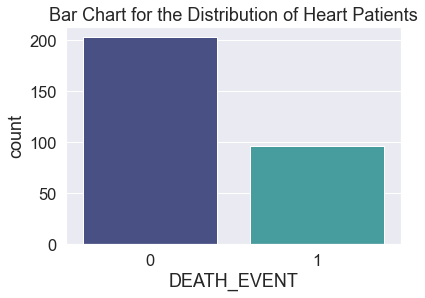

In [23]:
# bar chart for the death_event

sns.countplot(x='DEATH_EVENT', data =heart, palette='mako')
plt.title('Bar Chart for the Distribution of Heart Patients')

### Pie Chart for the percentage of Death of Patients after treatment

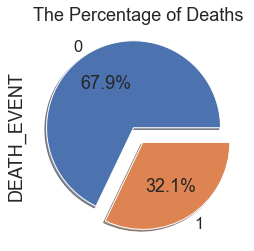

In [17]:
heart.DEATH_EVENT.value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True)
plt.title('The Percentage of Deaths')
plt.show()

Analysis: One-third of the patients die due to heart failure

### Relationship of death_event & Sex: (0-Female, 1-Male) 

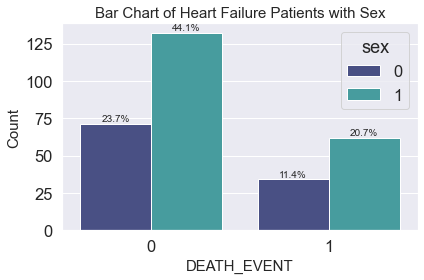

In [118]:
ax = sns.countplot(data = heart, x = 'DEATH_EVENT',hue='sex', palette='mako')
ax.axes.set_title("Bar Chart of Heart Failure Patients with Sex", fontsize=15)
ax.set_xlabel("DEATH_EVENT",fontsize=15)
ax.set_ylabel("Count",fontsize=15)
total = len(heart_copy)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()

plt.show()

Analysis: Male is more prone to death after getting treatment for heart failure

### Relationship of death_event with Diabetes: 0: No Diabetes, 1: Diabetes

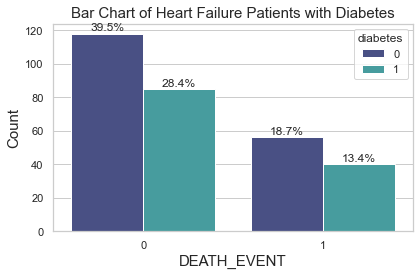

In [101]:
ax = sns.countplot(data = heart, x = 'DEATH_EVENT',hue='diabetes', palette='mako')
ax.axes.set_title("Bar Chart of Heart Failure Patients with Diabetes", fontsize=15)
ax.set_xlabel("DEATH_EVENT",fontsize=15)
ax.set_ylabel("Count",fontsize=15)
total = len(heart_copy)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()

plt.show()

Analysis: The bar chart shows that there is some relationship between the diabetes and heart failure.Significant number of Patients who are suffering from diabetes are also going thourgh heart failure. Also 41% of the patients are diabetic

### Relationship of death_event with Anaemia

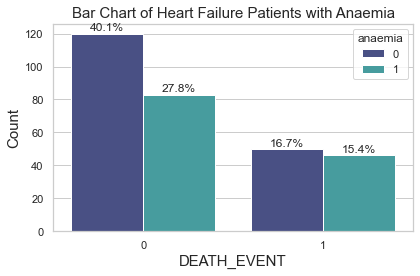

In [103]:
ax = sns.countplot(data = heart, x = 'DEATH_EVENT',hue='anaemia', palette='mako')
ax.axes.set_title("Bar Chart of Heart Failure Patients with Anaemia", fontsize=15)
ax.set_xlabel("DEATH_EVENT",fontsize=15)
ax.set_ylabel("Count",fontsize=15)
total = len(heart_copy)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()

plt.show()

Analysis: There are 15% of the patients who have iron deficiency and died due to heart failure. Also there are 43% (27.8+15.4) of the patients who are anaemic which is significantly high 27.8+15.4

### Scatter Plot of Age and Time categorised with death_event 

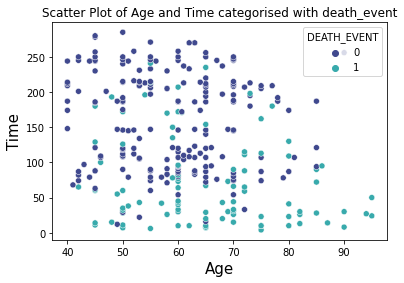

In [5]:
ax = sns.scatterplot(data=heart, x="age", y="time", hue="DEATH_EVENT", palette='mako')
plt.title("Scatter Plot of Age and Time categorised with death_event")
ax.set_xlabel("Age",fontsize=15)
ax.set_ylabel("Time",fontsize=15)
plt.show()


Analysis: patients after the age of 70 end up dying the treatment period is very small which means physicians are not able to treat successfully due to vulnerable age.

# Age

### Age Distribution over the Dataset

Text(0.5, 1.0, 'Distribution of Age of the Patients')

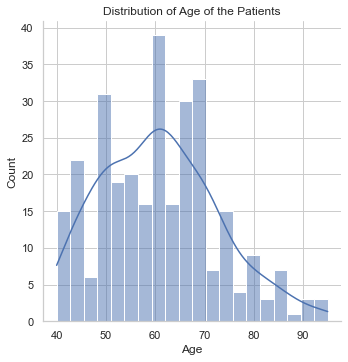

In [109]:
b = sns.displot(heart['age'], kde=True, bins=20)
plt.xlabel("Age")
plt.title("Distribution of Age of the Patients")

People of age 60 are more vulnerable to serious medical condition. Here it heart failure

### Box Plot of Age with Death_event

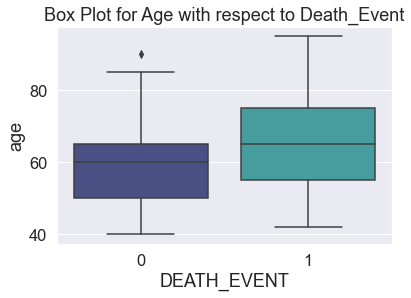

In [119]:
sns.boxplot(data=heart, y = 'age', x='DEATH_EVENT', palette='mako')
ax.set_xlabel("DEATH_EVENT",fontsize=15)
ax.set_ylabel("Age",fontsize=15)
plt.title("Box Plot for Age with respect to Death_Event")
plt.show()

Analysis: Hardly any outliers in the age and with death is more prominent with increasing age.

## Data Pre- processing

### Feature Selection

### 1. Pearson's Correlation

In [88]:
corr_matrix = heart.corr()
corr_matrix['DEATH_EVENT'].sort_values(ascending=False)

DEATH_EVENT                 1.000000
serum_creatinine            0.294278
age                         0.253729
high_blood_pressure         0.079351
anaemia                     0.066270
creatinine_phosphokinase    0.062728
diabetes                   -0.001943
sex                        -0.004316
smoking                    -0.012623
platelets                  -0.049139
serum_sodium               -0.195204
ejection_fraction          -0.268603
time                       -0.526964
Name: DEATH_EVENT, dtype: float64

The features 'age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', and 'time' have a considerable correlation with 'DEATH_EVENT'

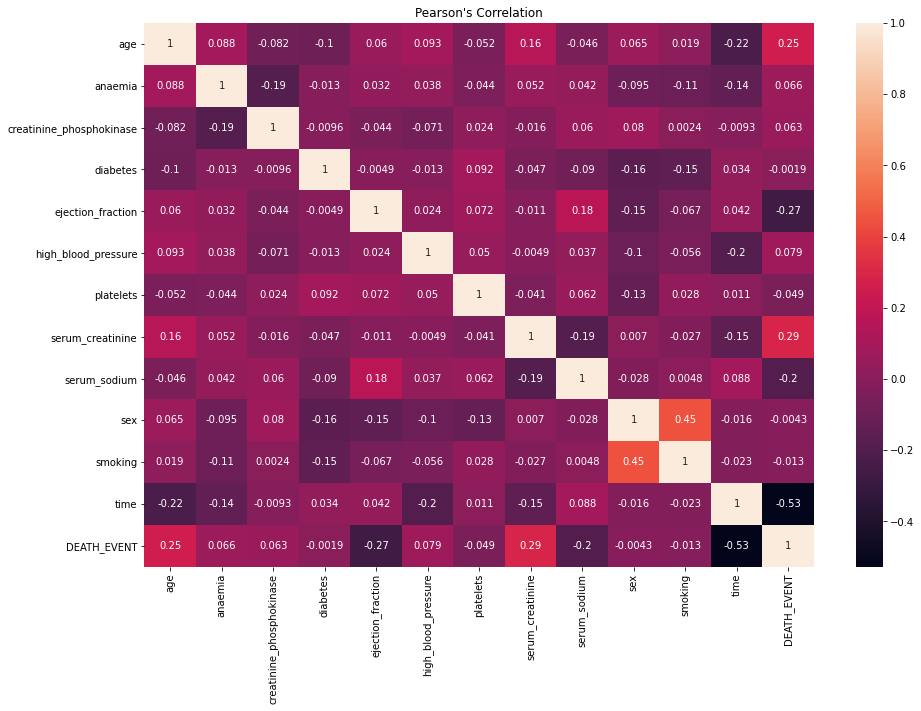

In [17]:
plt.figure(figsize=(15,10))
b = sns.heatmap(heart.corr(),annot=True)
plt.title("Pearson's Correlation")
plt.show()

#### Important Fratures
1. time: -0.53
2. serum_creatinine: 0.29
3. serum_fraction: -0.27
4. serum_sodium:-0.2

### 2. Spearman Correlation

In [10]:
corr_matrix = heart.corr(method="spearman")
corr_matrix['DEATH_EVENT'].sort_values(ascending=False)

DEATH_EVENT                 1.000000
serum_creatinine            0.370630
age                         0.218125
high_blood_pressure         0.079351
anaemia                     0.066270
creatinine_phosphokinase    0.023616
diabetes                   -0.001943
sex                        -0.004316
smoking                    -0.012623
platelets                  -0.046200
serum_sodium               -0.209837
ejection_fraction          -0.286869
time                       -0.543179
Name: DEATH_EVENT, dtype: float64

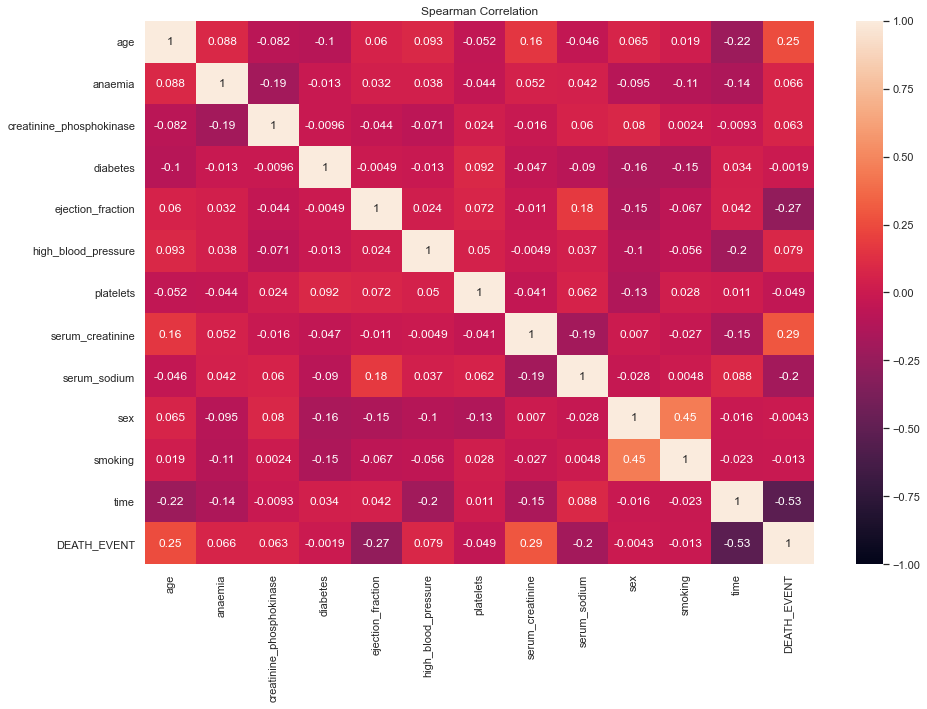

In [90]:
def display_correlation(df):
    r = df.corr(method="spearman")
    plt.figure(figsize=(15,10))
    heatmap = sns.heatmap(df.corr(), vmin=-1, 
                      vmax=1, annot=True)
    plt.title("Spearman Correlation")
display_correlation(df=heart)

#### Important Features
1. time: -0.53
2. serum_creatnine: 0.29
3. age: 0.25
4. ejection_fraction: -0.27

### Outliers Detection

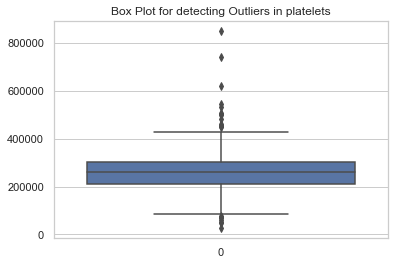

In [96]:
sns.boxplot(data=heart['platelets'])
plt.title("Box Plot for detecting Outliers in platelets")
plt.show()

Text(0.5, 1.0, 'Box Plot for detecting Outliers in serum_creatinine')

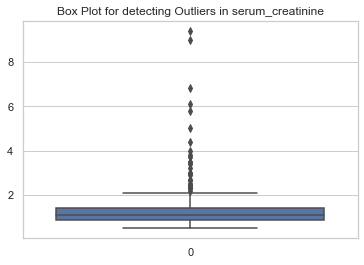

In [94]:
sns.boxplot(data=heart['serum_creatinine'])
plt.title("Box Plot for detecting Outliers in serum_creatinine")

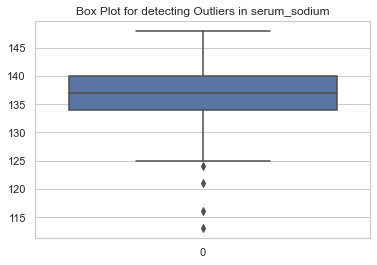

In [97]:
sns.boxplot(data=heart['serum_sodium'])
plt.title("Box Plot for detecting Outliers in serum_sodium")
plt.show()

As there are many outliers in the dataset in platlets, serum_creatinine, platlets, sereu_sodium, we would go not delete any ouliers due to the lack of the knowledge of the medical terms

In [21]:
# creating copy of the dataset
heart_copy = heart.copy()
heart_copy.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


## Robust Scaler: Feature Scaling

In [22]:
robust = RobustScaler() # creating instance of Robust Scaler
robust_heart = robust.fit_transform(heart_copy) # using fit and transfer function
robust_heart = pd.DataFrame(robust_heart)
robust_heart.columns = heart_copy.columns
robust_heart.head() # checking first five rows of the robust scaled dataset

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,0.789474,0.0,0.713212,0.0,-1.2,1.0,0.032967,1.6,-1.166667,0.0,0.0,-0.853846,1.0
1,-0.263158,0.0,16.350161,0.0,0.0,0.0,0.014923,0.0,-0.166667,0.0,0.0,-0.838462,1.0
2,0.263158,0.0,-0.223416,0.0,-1.2,0.0,-1.098901,0.4,-1.333333,0.0,1.0,-0.830769,1.0
3,-0.526316,1.0,-0.298604,0.0,-1.2,0.0,-0.571429,1.6,0.000000,0.0,0.0,-0.830769,1.0
4,0.263158,1.0,-0.193340,1.0,-1.2,0.0,0.714286,3.2,-3.500000,-1.0,0.0,-0.823077,1.0


### Splitting the Dataset into 70% and 30%

#### Scaled data through Robust Scaler

In [54]:
# important features from pearson and spearman method combined and saved into new dataset
Features = ['time','ejection_fraction','serum_creatinine', 'age', 'serum_sodium']

X = robust_heart[Features]

y = robust_heart["DEATH_EVENT"]
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=2)

In [33]:
X_train.shape, y_train.shape

((209, 5), (209,))

### Oversampling (SMOTE)

In [66]:
sm = SMOTE(random_state = 0)# creating the instance of SMOTE
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
X_train_smote.shape, y_train_smote.shape # rows and columns after SMOTE

((274, 5), (274,))

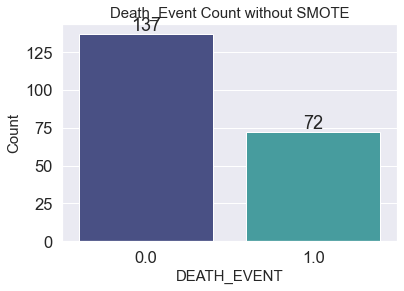

In [38]:
ax = sns.countplot(x = y_train, palette='mako')
ax.axes.set_title("Death_Event Count without SMOTE", fontsize=15)
ax.set_xlabel("DEATH_EVENT",fontsize=15)
ax.set_ylabel("Count",fontsize=15)
for i in ax.containers:
    ax.bar_label(i,)

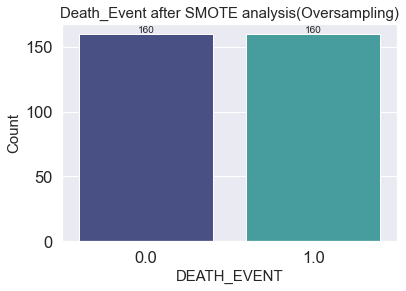

In [15]:
ax = sns.countplot(x = y_train_smote, palette='mako')
ax.axes.set_title("Death_Event after SMOTE analysis(Oversampling)", fontsize=15)
ax.set_xlabel("DEATH_EVENT",fontsize=15)
ax.set_ylabel("Count",fontsize=15)
for i in ax.containers:
    ax.bar_label(i,)

## Logistic Regression Classifier

### Without SMOTE

In [56]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)
log_reg_acc = accuracy_score(y_test, log_reg_pred)

### Confusion Matrix

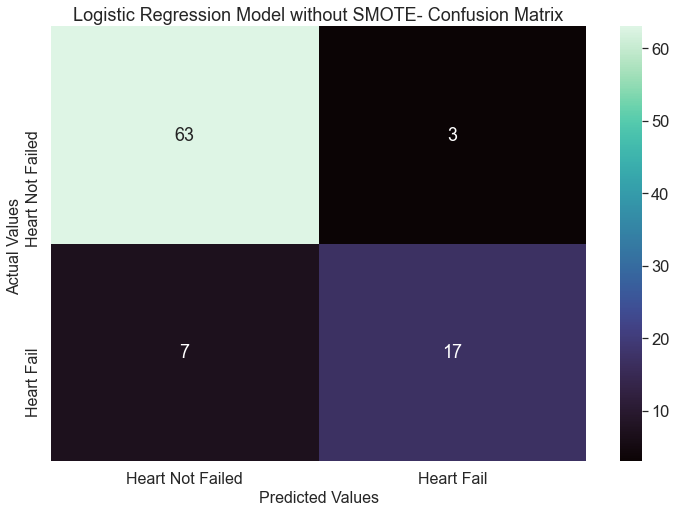

In [87]:
plt.figure(figsize=(12,8))
cm=confusion_matrix(y_test,log_reg_pred)
ax = sns.heatmap(cm, annot=True,cmap='mako')
plt.title("Logistic Regression Model without SMOTE- Confusion Matrix")
ax.xaxis.set_ticklabels(["Heart Not Failed","Heart Fail"], fontsize=16)
ax.yaxis.set_ticklabels(["Heart Not Failed","Heart Fail"], fontsize=16)
ax.set_xlabel('Predicted Values', fontsize=16)
ax.set_ylabel('Actual Values ', fontsize=16);
plt.show()

### Classification Report

In [92]:
print(classification_report(y_test, log_reg_pred))# without SMOTE

              precision    recall  f1-score   support

         0.0       0.90      0.95      0.93        66
         1.0       0.85      0.71      0.77        24

    accuracy                           0.89        90
   macro avg       0.88      0.83      0.85        90
weighted avg       0.89      0.89      0.89        90



### With SMOTE

In [105]:
# with smote X_train_smote. y_train_smote
log_reg = LogisticRegression()
log_reg.fit(X_train_smote, y_train_smote)
log_reg_pred_smote = log_reg.predict(X_test)
log_reg_acc_smote = accuracy_score(y_test, log_reg_pred_smote)

### Confusion Matrix

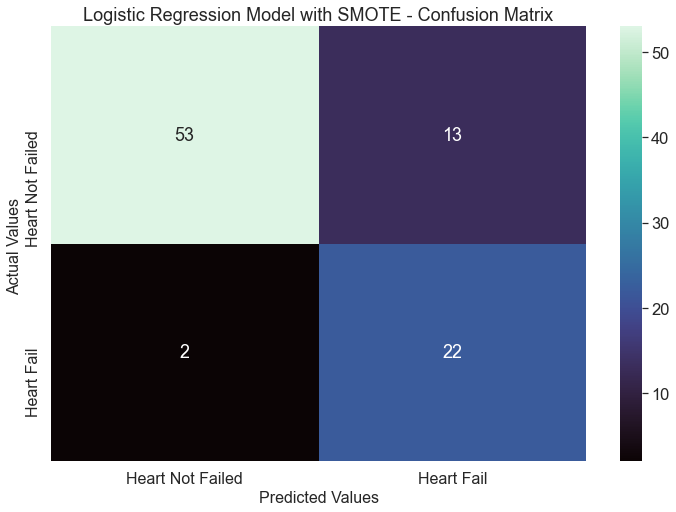

In [85]:
plt.figure(figsize=(12,8))
cm=confusion_matrix(y_test,log_reg_pred_smote)
ax = sns.heatmap(cm, annot=True,cmap='mako')
plt.title("Logistic Regression Model with SMOTE - Confusion Matrix")
ax.xaxis.set_ticklabels(["Heart Not Failed","Heart Fail"], fontsize=16)
ax.yaxis.set_ticklabels(["Heart Not Failed","Heart Fail"], fontsize=16)
ax.set_xlabel('Predicted Values', fontsize=16)
ax.set_ylabel('Actual Values ', fontsize=16);
plt.show()

### Classification Report

In [86]:
print(classification_report(y_test, log_reg_pred_smote)) # with SMOTE

              precision    recall  f1-score   support

         0.0       0.96      0.80      0.88        66
         1.0       0.63      0.92      0.75        24

    accuracy                           0.83        90
   macro avg       0.80      0.86      0.81        90
weighted avg       0.87      0.83      0.84        90



## K Nearest Neighbours Classifier

In [102]:
max_n_neighbours = 20 # setting the count of maximum neighbours

### Without SMOTE

In [108]:
# Without SMOTE
# Create the k, score dictionaries
k_dict = {}
scores_dict = {}

# Loop through weights types
for weights in ["uniform","distance"]:
    # Create k, score lists
    k_list = []
    scores_list = []
    print(weights)

    # Loop through k neighbours 
    for k in range(1, max_n_neighbours):
        # Create KNN Classifier and train the model
        clf = KNeighborsClassifier(n_neighbors=k, weights=weights, metric="euclidean")
        clf.fit(X_train, y_train)

        # Calculate predictions on test set
        y_pred = clf.predict(X_test)
        k_list.append(k)

        # Calculate accuracy scores
        accuracy = metrics.accuracy_score(y_test, y_pred)
        print("k %s, accuracy: %s" %(k, accuracy))
        scores_list.append(accuracy)
    
    # Add k, score lists to their respective dictionaries
    k_dict[weights] = k_list
    scores_dict[weights] = scores_list

uniform
k 1, accuracy: 0.8222222222222222
k 2, accuracy: 0.7888888888888889
k 3, accuracy: 0.7888888888888889
k 4, accuracy: 0.8222222222222222
k 5, accuracy: 0.8666666666666667
k 6, accuracy: 0.8777777777777778
k 7, accuracy: 0.9
k 8, accuracy: 0.8888888888888888
k 9, accuracy: 0.8777777777777778
k 10, accuracy: 0.8444444444444444
k 11, accuracy: 0.8555555555555555
k 12, accuracy: 0.8666666666666667
k 13, accuracy: 0.8888888888888888
k 14, accuracy: 0.8888888888888888
k 15, accuracy: 0.9
k 16, accuracy: 0.8888888888888888
k 17, accuracy: 0.8888888888888888
k 18, accuracy: 0.8666666666666667
k 19, accuracy: 0.8777777777777778
distance
k 1, accuracy: 0.8222222222222222
k 2, accuracy: 0.8222222222222222
k 3, accuracy: 0.7888888888888889
k 4, accuracy: 0.8333333333333334
k 5, accuracy: 0.8444444444444444
k 6, accuracy: 0.8666666666666667
k 7, accuracy: 0.8666666666666667
k 8, accuracy: 0.9
k 9, accuracy: 0.8888888888888888
k 10, accuracy: 0.8888888888888888
k 11, accuracy: 0.8777777777777

In [109]:
# Choosing k=13 as the optiumum value to build KNN model
kn_clf = KNeighborsClassifier(n_neighbors=13)
kn_clf.fit(X_train, y_train)
kn_pred1 = kn_clf.predict(X_test)
kn_acc = accuracy_score(y_test, kn_pred1)

### Confusion Matrix

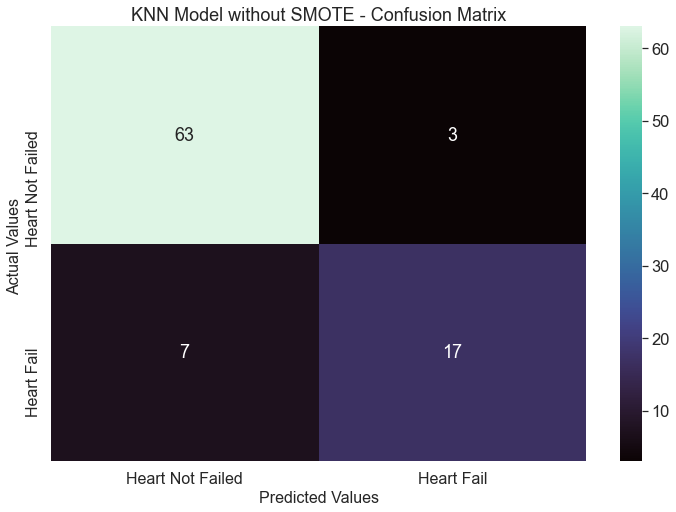

In [110]:
plt.figure(figsize=(12,8))
cm=confusion_matrix(y_test,kn_pred1)
ax = sns.heatmap(cm, annot=True,cmap='mako')
plt.title("KNN Model without SMOTE - Confusion Matrix")
ax.xaxis.set_ticklabels(["Heart Not Failed","Heart Fail"], fontsize=16)
ax.yaxis.set_ticklabels(["Heart Not Failed","Heart Fail"], fontsize=16)
ax.set_xlabel('Predicted Values', fontsize=16)
ax.set_ylabel('Actual Values ', fontsize=16);
plt.show()

### Classification Report

In [111]:
print(classification_report(y_test, kn_pred1))

              precision    recall  f1-score   support

         0.0       0.90      0.95      0.93        66
         1.0       0.85      0.71      0.77        24

    accuracy                           0.89        90
   macro avg       0.88      0.83      0.85        90
weighted avg       0.89      0.89      0.89        90



### With SMOTE

In [103]:
# Create the k, score dictionaries
k_dict = {}
scores_dict = {}

# Loop through weights types
for weights in ["uniform","distance"]:
    # Create k, score lists
    k_list = []
    scores_list = []
    print(weights)

    # Loop through k neighbours 
    for k in range(1, max_n_neighbours):
        # Create KNN Classifier and train the model
        clf = KNeighborsClassifier(n_neighbors=k, weights=weights, metric="euclidean")
        clf.fit(X_train_smote, y_train_smote)

        # Calculate predictions on test set
        y_pred = clf.predict(X_test)
        k_list.append(k)

        # Calculate accuracy scores
        accuracy = metrics.accuracy_score(y_test, y_pred)
        print("k %s, accuracy: %s" %(k, accuracy))
        scores_list.append(accuracy)
    
    # Add k, score lists to their respective dictionaries
    k_dict[weights] = k_list
    scores_dict[weights] = scores_list

uniform
k 1, accuracy: 0.8
k 2, accuracy: 0.7888888888888889
k 3, accuracy: 0.7888888888888889
k 4, accuracy: 0.7777777777777778
k 5, accuracy: 0.8
k 6, accuracy: 0.8444444444444444
k 7, accuracy: 0.8333333333333334
k 8, accuracy: 0.8333333333333334
k 9, accuracy: 0.8222222222222222
k 10, accuracy: 0.8555555555555555
k 11, accuracy: 0.8444444444444444
k 12, accuracy: 0.8444444444444444
k 13, accuracy: 0.8222222222222222
k 14, accuracy: 0.8666666666666667
k 15, accuracy: 0.8444444444444444
k 16, accuracy: 0.8666666666666667
k 17, accuracy: 0.8666666666666667
k 18, accuracy: 0.8666666666666667
k 19, accuracy: 0.8555555555555555
distance
k 1, accuracy: 0.8
k 2, accuracy: 0.8
k 3, accuracy: 0.7777777777777778
k 4, accuracy: 0.8111111111111111
k 5, accuracy: 0.7888888888888889
k 6, accuracy: 0.8222222222222222
k 7, accuracy: 0.8222222222222222
k 8, accuracy: 0.8111111111111111
k 9, accuracy: 0.8111111111111111
k 10, accuracy: 0.8222222222222222
k 11, accuracy: 0.8222222222222222
k 12, accur

In [107]:
# building KNN model with k=19
kn_clf = KNeighborsClassifier(n_neighbors=19)
kn_clf.fit(X_train_smote, y_train_smote)
kn_pred2 = kn_clf.predict(X_test)
kn_acc = accuracy_score(y_test, kn_pred2)

### Confusion Matrix

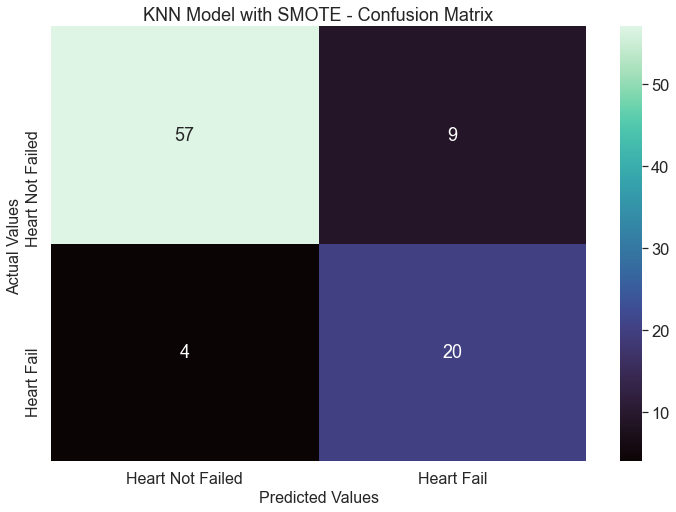

In [96]:
plt.figure(figsize=(12,8))
cm=confusion_matrix(y_test,kn_pred2)
ax = sns.heatmap(cm, annot=True,cmap='mako')
plt.title("KNN Model with SMOTE - Confusion Matrix")
ax.xaxis.set_ticklabels(["Heart Not Failed","Heart Fail"], fontsize=16)
ax.yaxis.set_ticklabels(["Heart Not Failed","Heart Fail"], fontsize=16)
ax.set_xlabel('Predicted Values', fontsize=16)
ax.set_ylabel('Actual Values ', fontsize=16);
plt.show()

### Classification Report

In [97]:
print(classification_report(y_test, kn_pred2))

              precision    recall  f1-score   support

         0.0       0.93      0.86      0.90        66
         1.0       0.69      0.83      0.75        24

    accuracy                           0.86        90
   macro avg       0.81      0.85      0.83        90
weighted avg       0.87      0.86      0.86        90



### Tabulating Model Names with Accuracy

In [139]:
dict = {'Models':['Logistic Regression','Logistic Regression + SMOTE','KNN', 'KNN + SMOTE'], 
                                 'accuracy':[89, 83, 89, 86]}
models = pd.DataFrame.from_dict(dict)

In [142]:
models

,Models,accuracy
0,Logistic Regression,89
1,Logistic Regression + SMOTE,83
2,KNN,89
3,KNN + SMOTE,86
